In [43]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [44]:
# Open and read both data files
mouse_metadata_file = "Resources/Mouse_metadata.csv"
study_results_file = "Resources/Study_results.csv"

# Read and preview the data in a datafram
mouse_metadata_master = pd.read_csv(mouse_metadata_file)
mouse_metadata_master.head()

study_results_master = pd.read_csv(study_results_file)
study_results_master.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [45]:
# Merge the dataframes
compiled_data_master = pd.merge(study_results_master, mouse_metadata_master, on="Mouse ID")
compiled_data_master.head(100)
# Ok, differentiated drugs are here

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
95,x930,25,53.726101,0,Naftisol,Male,13,26
96,o725,0,45.000000,0,Naftisol,Male,4,26
97,o725,5,46.889821,0,Naftisol,Male,4,26
98,o725,10,48.199452,0,Naftisol,Male,4,26


In [46]:
# Confirm each row is unique
# Many thanks to Stephanie Richards for her help!
duplicates = compiled_data_master[compiled_data_master.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [47]:
# Drop data for duplicated mouse
# df.loc[df['shield'] > 6]
cleaned_master = compiled_data_master.loc[compiled_data_master["Mouse ID"] != "g989"]
cleaned_master.head(100)
# Ok, drug differentiation is here too

test_inf = cleaned_master.loc[cleaned_master["Drug Regimen"] == "Infubinol"]
test_inf
# Ok, the lower values are here. So somewhere down the line something is getting dropped

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
213,c326,0,45.000000,0,Infubinol,Female,18,25
214,c326,5,36.321346,0,Infubinol,Female,18,25
215,c139,0,45.000000,0,Infubinol,Male,11,28
216,c139,5,48.753112,0,Infubinol,Male,11,28
217,c139,10,49.992954,0,Infubinol,Male,11,28
...,...,...,...,...,...,...,...,...
1655,f345,25,53.078894,0,Infubinol,Male,23,26
1656,f345,30,54.363797,1,Infubinol,Male,23,26
1657,f345,35,56.523327,1,Infubinol,Male,23,26
1658,f345,40,58.315593,1,Infubinol,Male,23,26


In [48]:
# Summary Statistics Table
# mean, median, variance, STD, SEM of tumor volume for EACH drug regimen

In [49]:
drug_groups = cleaned_master.groupby("Drug Regimen")
mean_tumor_volume = drug_groups["Tumor Volume (mm3)"].mean()
# mean_tumor_volume
median_tumor_volume = drug_groups["Tumor Volume (mm3)"].median()
# median_tumor_volume
variance_tumor_volume = drug_groups["Tumor Volume (mm3)"].var()
# variance_tumor_volume
STD_tumor_volume = drug_groups["Tumor Volume (mm3)"].std()
# STD_tumor_volume
SEM_tumor_volume = drug_groups["Tumor Volume (mm3)"].sem()
# SEM_tumor_volume

In [50]:
# Start building summary table
Summary_Statistics_Table = pd.DataFrame({
    "Mean of Tumor Volume": mean_tumor_volume, 
    "Median of Tumor Volume": median_tumor_volume,
    "Variance of Tumor Volume": variance_tumor_volume,
    "Standard Deviation of Tumor Volume": STD_tumor_volume,
    "SEM of Tumor Volume": SEM_tumor_volume
})
Summary_Statistics_Table

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [51]:
# Make two identical bar charts with two different methods
# First with DataFrame.plot()
# Second with Matplotlib pyplot

In [52]:
# But first assemble the data to plot
cleaned_master.groupby("Drug Regimen").count()
count_of_measurements = drug_groups["Timepoint"].count()
# count_of_measurements

list_of_regimens = cleaned_master["Drug Regimen"].unique()
# list_of_regimens
alpha_regimens = sorted(list_of_regimens)
# alpha_regimens
# Ok, differentiation here as well
# What the heck happened yesterday??

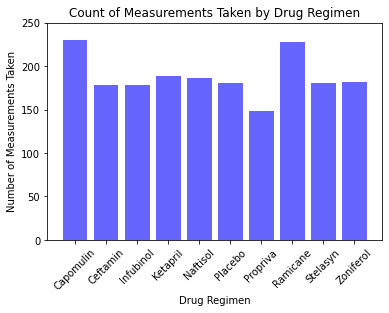

In [59]:
# Well, let's fumble through with matplotlib
# Could be worse, but it's here, so I guess I'll move on and come back
y_axis = count_of_measurements
x_axis = np.arange(len(alpha_regimens))

# Tell matplotlib to make a bar chart
plt.bar(x_axis, y_axis, color="blue", alpha=0.6, align="center")

# Make it nicer

plt.title("Count of Measurements Taken by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.ylim(0, 250)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, alpha_regimens, rotation="45")

plt.show()


# plt.xlim(0, 10)
# plt.ylim(-1, 1)


In [60]:
# Now to try with DataFrame.plot I guess

count_of_measurements_df = pd.DataFrame({
    "Drug Regimen": alpha_regimens,
    "Count of Measurement": count_of_measurements
})

# df.reset_index(drop=True)

# count_of_measurements_df.reset_index(drop=True)

count_of_measurements_df

# count_of_measurements

,Drug Regimen,Count of Measurement
Drug Regimen,,
Capomulin,Capomulin,230
Ceftamin,Ceftamin,178
Infubinol,Infubinol,178
Ketapril,Ketapril,188
Naftisol,Naftisol,186
Placebo,Placebo,181
Propriva,Propriva,148
Ramicane,Ramicane,228
Stelasyn,Stelasyn,181


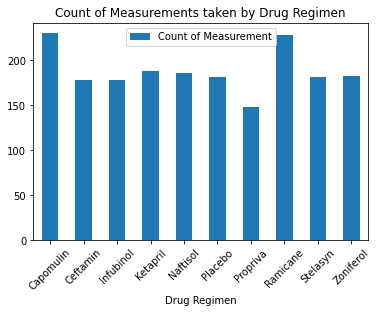

In [65]:
# Make the plot
# This still feels a little weird
x = "Drug Regimen"
y = "Count of Measurement"
title = "Count of Measurements taken by Drug Regimen"

measurement_by_regimen = count_of_measurements_df.plot.bar(x=x, y=y, rot=45, title=title)
measurement_by_regimen

In [66]:
# Make two pie charts for gender distribution, same approach as bar charts

In [67]:
cleaned_master.groupby("Sex").count()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


In [68]:
# Get count of male and female mice
# df.loc[df['shield'] > 6]
# Are these counts drawn from the wrong dataframe?
# Too many and multi counting the same mouse?
female_mice_count = len(cleaned_master.loc[cleaned_master["Sex"] == "Female"])
female_mice_count
male_mice_count = len(cleaned_master.loc[cleaned_master["Sex"] == "Male"])
male_mice_count

958

In [69]:
# Make a stupid dataframe
gender_df = pd.DataFrame({
    "Sex": ["Female", "Male"],
    "Count": [female_mice_count, male_mice_count]
})
gender_df

,Sex,Count
0,Female,922
1,Male,958


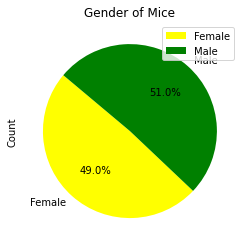

In [78]:
# Make a pie chart with df.plot
# Weird legend is weird
labels = ["Female", "Male"]
colors = ["yellow", "green"]
count_by_sex = gender_df.plot.pie(y="Count", autopct="%1.1f%%", colors=colors, 
                                  labels=labels, startangle=140)
plt.title(label="Gender of Mice")


count_by_sex

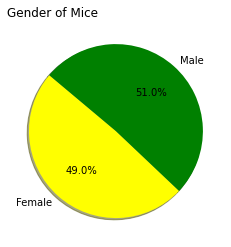

In [79]:
# Make a pie chart with matplotlib

pie_labels = ["Female", "Male"]
gender_counts = [female_mice_count, male_mice_count]
colors = ["yellow", "green"]
plt.pie(gender_counts, labels=pie_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title(label="Gender of Mice", loc="left")

plt.show()

# plt.title = "Gender of Mice"
# Why doesn't this show?
# Somehow the title got set behind the scenese with plt.title="gender" and it needs to look like above

In [80]:
# Well, all those charts are ugly as sin, but they do exist. 
# Come back to them and make then nicer later

In [83]:
# Trying something else care of Alyssa K and Stephanie Richards
# THIS WORKS HALLELUJAH
# Walk through this and clean up the mess
# It feels like it's all needed but it's gross

top_drugs_tumor_two = cleaned_master.loc[(cleaned_master["Drug Regimen"] == "Capomulin") | 
                                          (cleaned_master["Drug Regimen"] == "Ramicane") | 
                                          (cleaned_master["Drug Regimen"] == "Infubinol") | 
                                          (cleaned_master["Drug Regimen"] == "Ceftamin")]
top_drugs_df_max = top_drugs_tumor_two.groupby("Mouse ID").max()
# top_drugs_df_max.head(30) # c326 is still showing at 45


# compiled_data_master = pd.merge(study_results_master, mouse_metadata_master, on="Mouse ID")

merged_top_drugs = pd.merge(top_drugs_df_max, cleaned_master, on=["Mouse ID", "Timepoint"])
merged_top_drugs.head(30)
# Ok, it's almost sort of there??? But also a mess

clean_top_drugs = merged_top_drugs[["Mouse ID", "Timepoint", "Tumor Volume (mm3)_y", 
                                    "Metastatic Sites_x", "Drug Regimen_x", "Sex_x", 
                                    "Age_months_x", "Weight (g)_x"]]

# df.rename(columns={"A": "a", "B": "c"})
clean_top_drugs = clean_top_drugs.rename(columns={"Tumor Volume (mm3)_y": "Tumor Volume (mm3)",
                                                 "Metastatic Sites_x": "Metastatic Sites",
                                                 "Drug Regimen_x": "Drug Regimen",
                                                 "Sex_x": "Sex",
                                                 "Age_months_x": "Age Months",
                                                 "Weight (g)_x": "Weight (g)"})
clean_top_drugs.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age Months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [84]:
capomulin_data = clean_top_drugs.loc[clean_top_drugs["Drug Regimen"] == "Capomulin"]
ramicane_data = clean_top_drugs.loc[clean_top_drugs["Drug Regimen"] == "Ramicane"]
infubinol_data = clean_top_drugs.loc[clean_top_drugs["Drug Regimen"] == "Infubinol"]
ceftamin_data = clean_top_drugs.loc[clean_top_drugs["Drug Regimen"] == "Ceftamin"]
# infubinol_data.head()

# OK getting the right root data means I can sub originating data and the rest "should" work

                                    

In [23]:
# This for loop was made possibly by Kelly Devillier

drug_subsets = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

 # drug is each dataframe   
for drug in drug_subsets:
    
    sub_drug_df = clean_top_drugs.loc[clean_top_drugs["Drug Regimen"] == drug]
    quartiles = sub_drug_df["Tumor Volume (mm3)"].quantile([.25, .5, .75])
    lowerq = quartiles[.25] 
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lbound = lowerq - (1.5 * iqr)
    ubound = upperq + (1.5 * iqr)

    volumes = sub_drug_df["Tumor Volume (mm3)"]

    # Flag entries that are greater or less than ubound and lbound
    outliers = sub_drug_df.loc[sub_drug_df["Tumor Volume (mm3)"] < lbound]
    print(outliers)

In [26]:
# Try to make everything dependent on the for loop above to remove this
# Or just keep volume lists for below?

# Capomulin
cap_quartiles = capomulin_data["Tumor Volume (mm3)"].quantile([.25, .5, .75])
cap_lowerq = cap_quartiles[.25]
cap_upperq = cap_quartiles[.75]
cap_iqr = cap_upperq - cap_lowerq
cap_lbound = cap_lowerq - (1.5 * cap_iqr)
cap_ubound = cap_upperq + (1.5 * cap_iqr)

cap_volumes = capomulin_data["Tumor Volume (mm3)"]

# Flag entries that are greater or less than ubound and lbound
cap_outliers = capomulin_data.loc[capomulin_data["Tumor Volume (mm3)"] < cap_lbound]
cap_outliers


# Ramicane
ram_quartiles = ramicane_data["Tumor Volume (mm3)"].quantile([.25, .5, .75])
ram_lowerq = ram_quartiles[.25]
ram_upperq = ram_quartiles[.75]
ram_iqr = ram_upperq - ram_lowerq
ram_lbound = ram_lowerq - (1.5 * ram_iqr)
ram_ubound = ram_upperq + (1.5 * ram_iqr)

ram_volumes = ramicane_data["Tumor Volume (mm3)"]

# Flag entries that are greater or less than ubound and lbound
ram_outliers = ramicane_data.loc[ramicane_data["Tumor Volume (mm3)"] < ram_lbound]
ram_outliers


# Ceftamin
cef_quartiles = ceftamin_data["Tumor Volume (mm3)"].quantile([.25, .5, .75])
cef_lowerq = cef_quartiles[.25]
cef_upperq = cef_quartiles[.75]
cef_iqr = cef_upperq - cef_lowerq
cef_lbound = cef_lowerq - (1.5 * cef_iqr)
cef_ubound = cef_upperq + (1.5 * cef_iqr)

cef_volumes = ceftamin_data["Tumor Volume (mm3)"]

# Flag entries that are greater or less than ubound and lbound
cef_outliers = ceftamin_data.loc[ceftamin_data["Tumor Volume (mm3)"] < cef_lbound]
cef_outliers


# Infubinol
# This one is supposed to have an outlier and it's not showing up
# Troubleshoot here
inf_quartiles = infubinol_data["Tumor Volume (mm3)"].quantile([.25, .5, .75])
inf_lowerq = inf_quartiles[.25] 
inf_upperq = inf_quartiles[.75]
inf_iqr = inf_upperq - inf_lowerq
inf_lbound = inf_lowerq - (1.5 * inf_iqr)
inf_ubound = inf_upperq + (1.5 * inf_iqr)

inf_volumes = infubinol_data["Tumor Volume (mm3)"]

# Flag entries that are greater or less than ubound and lbound
inf_outliers = infubinol_data.loc[infubinol_data["Tumor Volume (mm3)"] < inf_lbound]
inf_outliers

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age Months,Weight (g)
15,c326,5,36.321346,0,Infubinol,Female,18,25


In [85]:
# Change this to Markdown
# According to quantitative analysis of each drug, only Infubinol has an outlier outside 1.5IQR

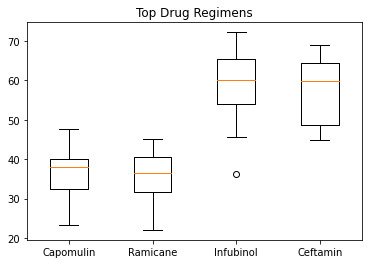

In [86]:
# What are the lists I need?
# cap_volumes, cef_volumes, inf_volumes, ram_valumes
# Make a list in order I want to have plots appear
drug_labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Make a list holding all the data in order of the drugs
tumor_volume_data = [cap_volumes, ram_volumes, inf_volumes, cef_volumes]

fig, ax = plt.subplots()
ax.boxplot(tumor_volume_data)
ax.set_xticklabels(drug_labels)
ax.set_title("Top Drug Regimens")
ax.

plt.show()

# fig, ax = plt.subplots()
# ax.boxplot(data)

# plt.show()

# ax.set_yticklabels(['data_1', 'data_2',  
#                     'data_3', 'data_4']) 
# https://matplotlib.org/3.1.1/gallery/statistics/boxplot_demo.html

In [32]:
# Pick a capomulin treaeted mouse
cap_mouse_data = cleaned_master.loc[cleaned_master["Drug Regimen"] == "Capomulin"]
# list(cap_mouse_data["Mouse ID"]) # I choose g316
 
# Isolate g316 data
g316_data = cleaned_master.loc[cleaned_master["Mouse ID"] == "g316"]
g316_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1815,g316,0,45.000000,0,Capomulin,Female,22,22
1816,g316,5,44.022752,0,Capomulin,Female,22,22
1817,g316,10,44.502042,0,Capomulin,Female,22,22
1818,g316,15,45.216743,0,Capomulin,Female,22,22
1819,g316,20,45.933322,1,Capomulin,Female,22,22
1820,g316,25,46.809225,1,Capomulin,Female,22,22
1821,g316,30,44.221480,2,Capomulin,Female,22,22
1822,g316,35,44.702833,2,Capomulin,Female,22,22
1823,g316,40,45.565821,2,Capomulin,Female,22,22
1824,g316,45,40.159220,2,Capomulin,Female,22,22


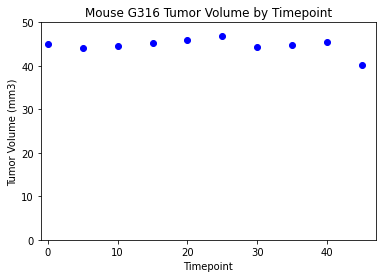

In [42]:
# Set variables for timepoint vs tumor volume line plot
timepoint = g316_data["Timepoint"]
tumor_volume = g316_data["Tumor Volume (mm3)"]

plt.plot(timepoint, tumor_volume, "bo")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse G316 Tumor Volume by Timepoint")
plt.xlim(-1, 47)
plt.ylim(0, 50)
plt.show()

In [ ]:
# Plot ALL mice weights against tumor volume (list of unique weights)
# Need a list of unique mice weights for capomulin treatment and list of tumor volumes
# So use the cap_mouse_data df wait no what about capomulin_data yes this one
capomulin_data
cap_weights = capomulin_data["Weight (g)"]
avg_cap_data = cap_mouse_data.groupby("Mouse ID").mean()
avg_cap_tumor = avg_cap_data["Tumor Volume (mm3)"]
avg_cap_tumor


plt.scatter(cap_weights, avg_cap_tumor)
plt.show()

# Needs prettying

In [ ]:
# Calculate correlation coefficient and linear regression for weight and average tumor volume
# cap_avg_tumor = capomulin_data["Tumor Volume (mm3)"].mean()
# average tumor volume of each mouse against its own weight

correlation = st.pearsonr(cap_weights, avg_cap_tumor)
# print(f"The correlation between weight and tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(cap_weights, avg_cap_tumor)
regress_values = cap_weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(cap_weights, avg_cap_tumor)
plt.plot(cap_weights, regress_values, "r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
# plt.xlabel('Weight in grams')
# plt.set_title("Weights vs Tumor Volume in Mice Treated with Capomulin")
plt.show()


In [33]:
# Set variables for timepoint vs tumor volume line plot
# Again, ugly as farts, but I'm moving forward and coming back

timepoint = g316_data["Timepoint"]
tumor_volume = g316_data["Tumor Volume (mm3)"
                         
                        

plt.plot(timepoint, tumor_volume, "bo")
                         



SyntaxError: invalid syntax (<ipython-input-33-a0eff8560fe5>, line 9)

In [ ]:
# x_values = housing_data['RM']
# y_values = housing_data['MEDV']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()

# income = who_data.iloc[:,1]
# alcohol = who_data.iloc[:,8]
# correlation = st.pearsonr(income,alcohol)

In [25]:
# Calculate quartiles for each drug
# Can this be done with top_drugs_tumor_data? 
# Or is it better to break it out by drug?
# quartiles = temperatures.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq
# quartiles